In [1]:
import requests
import pandas as pd
from datetime import datetime
import time

In [2]:
# Mens
# XS: 1|20|1|1512

In [3]:
url = 'https://api.gap.com/commerce/search/products/v2/cc?pageSize=200&pageNumber=0&ignoreInventory=false&cid=1031099&vendor=constructorio&client_id=9437c2ca-9cd7-4554-a655-ba12926e514c&session_id=4&trackingid=27186865898132285&includeMarketingFlagsDetails=true&enableDynamicFacets=true&enableDynamicPhoto=true&brand=on&locale=en_US&market=us&department=75&size=1%7C20%7C1%7C1512'

In [4]:
r = requests.get(url)
r

<Response [200]>

In [5]:
data = r.json()
#data

In [7]:
pagination = data.get('pagination')
pagination

{'pageSize': '200', 'currentPage': '0', 'pageNumberTotal': '5'}

In [15]:
totalpages = int(pagination.get('pageNumberTotal'))
totalpages

5

In [28]:
products = data.get('products')
#products

In [124]:
#products[0]

In [24]:
all_rows=[]
for product in products:
    style_id = product.get('styleId')
    style_name = product.get('styleName')
    reviewScore = product.get('reviewScore')
    reviewCount = product.get('reviewCount')
    styleColors = product.get('styleColors')
    for color in styleColors:
        ccId = color.get('ccId')
        ccName = color.get('ccName')
        ccShortDescription = color.get('ccShortDescription')
        effectivePrice = color.get('effectivePrice')
        regularPrice = color.get('regularPrice')
        percentageOff = color.get('percentageOff')
        inventoryCount = color.get('inventoryCount')
        vendorName = color.get('vendorName')

        all_rows.append({
            'style_id': style_id,
            'style_name': style_name,
            'reviewScore': reviewScore,
            'reviewCount': reviewCount,
            'ccId': ccId,
            'ccName': ccName,
            'ccShortDescription': ccShortDescription,
            'effectivePrice': effectivePrice,
            'regularPrice': regularPrice,
            'percentageOff': percentageOff,
            'inventoryCount': inventoryCount,
            'vendorName': vendorName
        })

In [25]:
df = pd.DataFrame(all_rows)

In [83]:
size_map ={
    'XS':'1%7C20%7C1%7C1512'
}

current_size = list(size_map.keys())[0]
current_size_call = list(size_map.values())[0]

url = f'https://api.gap.com/commerce/search/products/v2/cc?pageSize=200&pageNumber=0&ignoreInventory=false&cid=1031099&vendor=constructorio&client_id=9437c2ca-9cd7-4554-a655-ba12926e514c&session_id=4&trackingid=27186865898132285&includeMarketingFlagsDetails=true&enableDynamicFacets=true&enableDynamicPhoto=true&brand=on&locale=en_US&market=us&department=75&size={current_size_call}'
r = requests.get(url)
r

<Response [200]>

In [ ]:
size=1%7C20%7C1%7C1512

In [109]:
gender_map ={
    'M':75,
    'W': 136
}

for i,j in gender_map.items():
    print(i,j)

M 75
W 136


In [71]:
list(size_map.keys())[0]

'XS'

In [87]:
size_map ={
    'XS':'1%7C20%7C1%7C1512',
    'S': '1%7C20%7C1%7C126'
}

In [94]:
for key, value in size_map.items():
    print(key, value)

XS 1%7C20%7C1%7C1512
S 1%7C20%7C1%7C126


In [90]:
len(size_map)

2

In [122]:
# scrape all pages in a given category, size

gender_map ={
    'M':75,
    'W': 136
} # which can be added into the below, but note, M and W use different size maps

size_map ={
    'XS':'1%7C20%7C1%7C1512',
    'S': '1%7C20%7C1%7C126',
    'M': '1%7C20%7C1%7C127'
}

out = pd.DataFrame()

for current_size, current_size_call in size_map.items():
    
    print('scraping: ', current_size)
    
    url = f'https://api.gap.com/commerce/search/products/v2/cc?pageSize=200&pageNumber=0&ignoreInventory=false&cid=1031099&vendor=constructorio&client_id=9437c2ca-9cd7-4554-a655-ba12926e514c&session_id=4&trackingid=27186865898132285&includeMarketingFlagsDetails=true&enableDynamicFacets=true&enableDynamicPhoto=true&brand=on&locale=en_US&market=us&department=75&size={current_size_call}'
    r = requests.get(url)
    data = r.json()
    pagination = data.get('pagination')
    totalpages = int(pagination.get('pageNumberTotal'))
    print(totalpages)
    
    df_all = pd.DataFrame()
    
    for i in range(totalpages+1):
        print(i)
        url = f'https://api.gap.com/commerce/search/products/v2/cc?pageSize=200&pageNumber={i}&ignoreInventory=false&cid=1031099&vendor=constructorio&client_id=9437c2ca-9cd7-4554-a655-ba12926e514c&session_id=4&trackingid=27186865898132285&includeMarketingFlagsDetails=true&enableDynamicFacets=true&enableDynamicPhoto=true&brand=on&locale=en_US&market=us&department=75&size={current_size_call}'
        r = requests.get(url)
        data = r.json()
        
        products = data.get('products')
        
        all_rows=[]
        for product in products:
            style_id = product.get('styleId')
            style_name = product.get('styleName')
            reviewScore = product.get('reviewScore')
            reviewCount = product.get('reviewCount')
            styleColors = product.get('styleColors')
            for color in styleColors:
                ccId = color.get('ccId')
                ccName = color.get('ccName')
                ccShortDescription = color.get('ccShortDescription')
                effectivePrice = color.get('effectivePrice')
                regularPrice = color.get('regularPrice')
                percentageOff = color.get('percentageOff')
                inventoryCount = color.get('inventoryCount')
                vendorName = color.get('vendorName')
        
                all_rows.append({
                    'style_id': style_id,
                    'style_name': style_name,
                    'reviewScore': reviewScore,
                    'reviewCount': reviewCount,
                    'ccId': ccId,
                    'ccName': ccName,
                    'ccShortDescription': ccShortDescription,
                    'effectivePrice': effectivePrice,
                    'regularPrice': regularPrice,
                    'percentageOff': percentageOff,
                    'inventoryCount': inventoryCount,
                    'vendorName': vendorName
                })
        df = pd.DataFrame(all_rows)
    
        df_all = pd.concat([df_all,df])
        df_all = df_all.drop_duplicates().reset_index(drop=True)
        df_all['size'] = current_size
        
    out = pd.concat([out,df_all]).reset_index(drop=True)
    

scraping:  XS
5
0
1
2
3
4
5
scraping:  S
5
0
1
2
3
4
5
scraping:  M
5
0
1
2
3
4
5


In [111]:
out.inventoryCount.sum()

np.int64(261101)

In [106]:
df_all["effectivePrice"].mean()

np.float64(23.809000000000005)

In [43]:
df_all["percentageOff"] = pd.to_numeric(
    df_all["percentageOff"],
    errors="coerce"
)

In [49]:
df_all[df_all.percentageOff>0].shape

(650, 12)

In [50]:
df_all.shape

(843, 12)

In [51]:
df_all[df_all.percentageOff>0].shape[0]/df_all.shape[0]

0.7710557532621589

<Axes: >

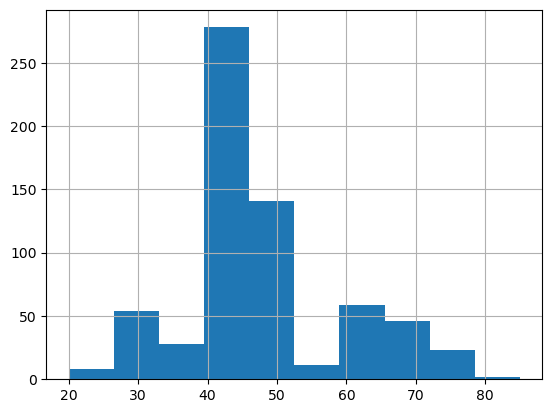

In [52]:
df_all.percentageOff.hist()

In [104]:
df_all["effectivePrice"] = pd.to_numeric(
    df_all["effectivePrice"],
    errors="coerce"
)

In [55]:
import matplotlib.pyplot as plt
plt.bar(df_all.percentageOff.astype('str'))

TypeError: bar() missing 1 required positional argument: 'height'

In [56]:
df_all.percentageOff.astype('str').value_counts()

percentageOff
40.0    221
nan     193
50.0    135
41.0     57
60.0     53
30.0     45
33.0     28
70.0     27
75.0     14
28.0      9
74.0      9
69.0      8
20.0      8
68.0      6
52.0      6
58.0      4
67.0      4
55.0      3
65.0      2
85.0      2
53.0      2
59.0      2
56.0      1
57.0      1
66.0      1
62.0      1
63.0      1
Name: count, dtype: int64

In [118]:
out

,style_id,style_name,reviewScore,reviewCount,ccId,ccName,ccShortDescription,effectivePrice,regularPrice,percentageOff,inventoryCount,vendorName,size
0,488674,Dynamic Fleece 4.0 Zip Hoodie,4.8,2077,488688052,Blue,Classic Navy,29.99,59.99,50,102,HANSAE CO LTD,XS
1,488674,Dynamic Fleece 4.0 Zip Hoodie,4.8,2077,488674112,Blue,EVENING REQUIEM,29.99,59.99,50,5,HANSAE CO LTD,XS
2,488674,Dynamic Fleece 4.0 Zip Hoodie,4.8,2077,488688012,Blue,Wintry Waters,29.99,59.99,50,11,HANSAE CO LTD,XS
3,488674,Dynamic Fleece 4.0 Zip Hoodie,4.8,2077,488688002,Gray,Light Heather Gray,29.99,59.99,50,30,HANSAE CO LTD,XS
4,488674,Dynamic Fleece 4.0 Zip Hoodie,4.8,2077,488674072,Gray,Medium Gray Heather,29.99,59.99,50,6,HANSAE CO LTD,XS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,887157,NHL T-Shirt for Adults,4.7,6,887157252,Red,HURRICANES RED,34.99,34.99,,66,"FANATICS LICENSED SPORT GROUP, LLC",M
2726,887157,NHL T-Shirt for Adults,4.7,6,887157142,Blue,JACKETS BLUE,34.99,34.99,,62,"FANATICS LICENSED SPORT GROUP, LLC",M
2727,887157,NHL T-Shirt for Adults,4.7,6,887157072,Red,CAPITALS RED,34.99,34.99,,109,"FANATICS LICENSED SPORT GROUP, LLC",M
2728,887157,NHL T-Shirt for Adults,4.7,6,887157052,Blue,CANUCKS BLUE,34.99,34.99,,63,"FANATICS LICENSED SPORT GROUP, LLC",M


In [58]:
df_all[df_all.percentageOff==52]

,style_id,style_name,reviewScore,reviewCount,ccId,ccName,ccShortDescription,effectivePrice,regularPrice,percentageOff,inventoryCount,vendorName
308,751411,Baltimore Ravens T-Shirt,4.7,949,778992002,Multi,Tampa Bay Buccaneers,14.49,29.99,52.0,80,"HYBRID PROMOTIONS, LLC"
410,801295,Sherpa-Lined Plaid Flannel Shacket,4.8,247,801294002,Green,Dark Olive,30.99,64.99,52.0,15,GOKALDAS EXPORTS LTD
431,835167,Rugby Stripe Sweater,4.6,47,835167002,Blue,Blue/Black Stripe,26.49,54.99,52.0,22,PRESSLINK LIMITED
442,841846,Dynamic Fleece Go-Warm Zip Hoodie,4.8,110,841846012,Black,Black Jack,30.99,64.99,52.0,7,HANSAE CO LTD
460,843396,Licensed Pop-Culture Graphic T-Shirt,4.6,140,843396002,Black,Chevy Blazer,14.49,29.99,52.0,99,MAD ENGINE GLOBAL LLC
463,807659,Loose Graphic T-Shirt,4.7,88,807659022,Beige,Sportsman Supply Co.,11.99,24.99,52.0,25,C SITE CO LTD


In [121]:
out.inventoryCount.sum()

np.int64(823039)

In [123]:
out.inventoryCount.sum()

np.int64(823065)